Instructions for updating:
Use `tf.global_variables_initializer` instead.


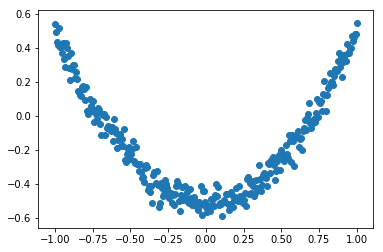

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Can not run dynamic pic in notebook, run 5layer.py instead.

# 添加神经网络层
def add_layer(inputs, in_size, out_size, activation_function=None):
    # 权重
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    
    # 类似列表 推荐初始值不为零 每一层有变化
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    # 线性关系
    if activation_function is None:
        outputs = Wx_plus_b
    # 激励函数
    else:
        outputs = activation_function(Wx_plus_b)
    
    return outputs
    

    
# 准备数据
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]    
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise



# None =》无论多少都OK
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# 层  输入层 隐藏层 输出层

# out_size 为10
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

predition = add_layer(l1, 10, 1, activation_function=None)

# predition 和 y_data的差别
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - predition), reduction_indices=[1]))

# 训练   参数 学习效率 小于1
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_data, y_data)
    plt.ion()
    plt.show()
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50  == 0:
            try :
                ax.lines.remove(lines[0])
            except Exception:
                pass
            # print(sess.run(loss, feed_dict={xs:x_data, ys: y_data}))
            predition_value = sess.run(predition, feed_dict={xs:x_data})
            lines = ax.plot(x_data, predition_value, "r-", lw=5)
            plt.pause(0.1)    
    
